# TASK 1

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [4]:
# importing dataset
data = pd.read_csv("train.csv")

In [5]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [6]:
data.shape

(14999, 9)

# TASK 2

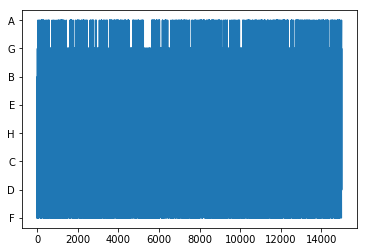

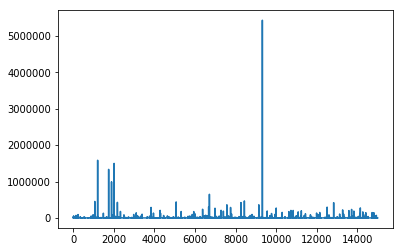

In [7]:
# visualising 
plt.plot(data["category"])
plt.show()
plt.plot(data["adview"])
plt.show()

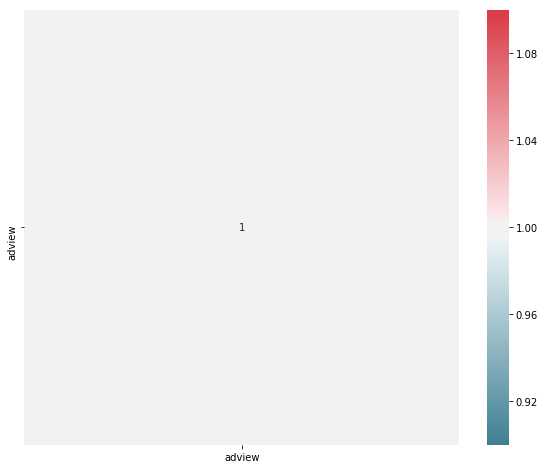

In [8]:
# heatmap
import seaborn as sns
f,ax = plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

# TASK 3

In [9]:
# remove videos with adview greater than 2000000 as outlier
data1 = data[data["adview"]<2000000]
data1.shape

(14998, 9)

In [10]:
# removing character "F" present in data
data1 = data1 [data1.views!='F']
data1 = data1 [data1.likes!='F']
data1 = data1 [data1.dislikes!='F']
data1 = data1 [data1.comment!='F']
data1.shape

(14636, 9)

# TASK 4

In [11]:
# assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data1["category"] = data1["category"].map(category)
column_vidid=data1['vidid']
data1.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [12]:
# encoding features 
from sklearn.preprocessing import LabelEncoder
data1["duration"] = LabelEncoder().fit_transform(data1["duration"])
data1["vidid"] = LabelEncoder().fit_transform(data1["vidid"])
data1["published"] = LabelEncoder().fit_transform(data1["published"])
data1.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [13]:
# convert Time_in_sec for duration
import datetime
import time

def checki(x):
        y = x[2:]
        h = ''
        m = ''
        s = ''
        mm = ''
        P = ['H','M','S']
        for i in y:
            if i not in P:
                mm+=i
            else:
                if(i=="H"):
                    h = mm
                    mm = ''
                elif(i == "M"):
                    m = mm
                    mm = ''
                else:
                    s = mm
                    mm = ''
        if(h==''):
            h = '00'
        if(m == ''):
            m = '00'
        if(s==''):
            s='00'
        bp = h+':'+m+':'+s
        return bp 

train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
        h, m, s = time_string.split(':')
        return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data1["duration"]=time1
data1.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


# TASK 5

In [14]:
# split data
Y_train = pd.DataFrame(data=data1.iloc[:,1].values, columns=["target"])
data1 = data1.drop(["adview"],axis=1)
data1 = data1.drop(["vidid"],axis=1)
data1.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data1, Y_train, test_size=0.2, random_state=42 )
X_train.shape

(11708, 7)

In [16]:
# normalise data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform (X_train)
X_test = scaler.fit_transform (X_test)
X_train.mean()

0.1739096800320488

# TASK 6

In [17]:
# evaluation metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [18]:
# linear regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.3780058245347
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [19]:
# support vector regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

D:\USER FILE\Softwares_installed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1697.0119703122805
Mean Squared Error: 833686973.2516664
Root Mean Squared Error: 28873.638032843497


# TASK 7


In [20]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 3238.0126366120217
Mean Squared Error: 1540684089.6144125
Root Mean Squared Error: 39251.54888172456


In [22]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 200, max_depth = 25, min_samples_split=15)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

D:\USER FILE\Softwares_installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Mean Absolute Error: 3279.091598029886
Mean Squared Error: 636723221.6119084
Root Mean Squared Error: 25233.375152997436


# TASK 8

In [ ]:
# artificial neural network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation="relu", input_shape=X_train.shape[1:]), Dense(6,activation="relu"), Dense(1)])
optimizer = keras.optimizers.Adam()
loss = keras.lossess.mean_squared_error
ann.compile(optimizer = optimizer, loss = loss, metrics = ["mean_squared_error"])
history = ann.fit(X_train, y_train, epochs=100)
ann.summary()
print_error(X_test, y_test, ann)

# TASK 9

Assuming root mean squared error as the deciding parameter for selecting the best model, Random Forest Regressor comes out to be the best model as it has lowest value of the root mean squared error.

# TASK 10

The model is saved. It is applied for test data to predict the adviews.

In [ ]:
# saving Scikitlearn models
import joblib
joblib.dump(random_forest, "randomforest_youtubeadview.pkl")

# saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")